In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

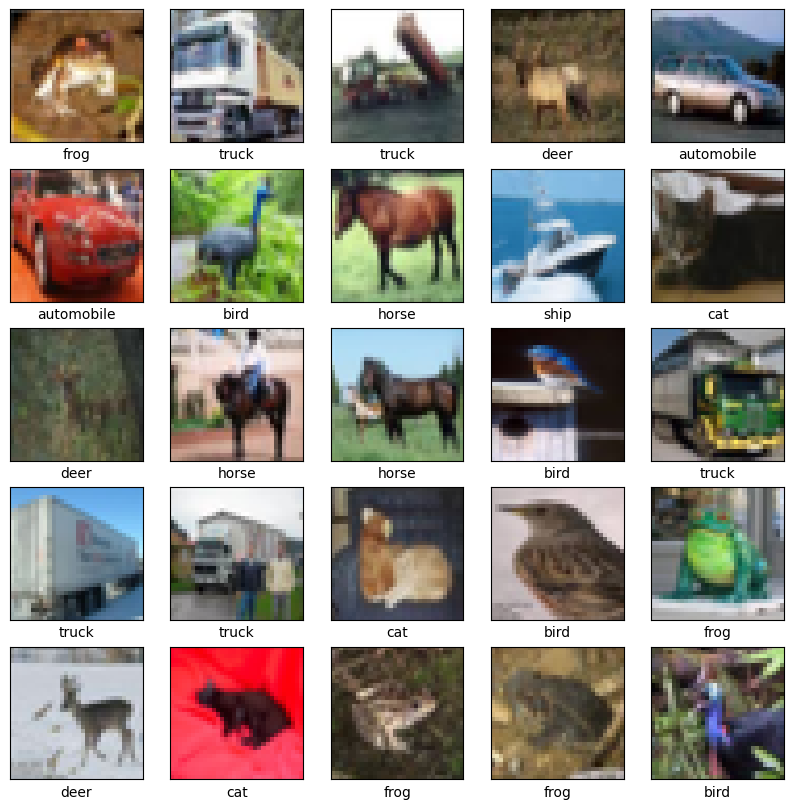

In [8]:
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [5]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [6]:
train_images = train_images / 255
test_images = test_images / 255 

In [7]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [8]:
model = Sequential()

In [9]:
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

In [11]:
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

In [12]:
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [15]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=3,
                    validation_data=(test_images, test_labels))

Epoch 1/3


782/782 [==============================] - 91s 112ms/step - loss: 1.9645 - accuracy: 0.3186 - val_loss: 1.4704 - val_accuracy: 0.4501
Epoch 2/3
782/782 [==============================] - 95s 122ms/step - loss: 1.4259 - accuracy: 0.4739 - val_loss: 1.3131 - val_accuracy: 0.5158
Epoch 3/3
782/782 [==============================] - 89s 114ms/step - loss: 1.1866 - accuracy: 0.5748 - val_loss: 1.2378 - val_accuracy: 0.5691


Text(0.5, 1.0, 'Loss Curves')

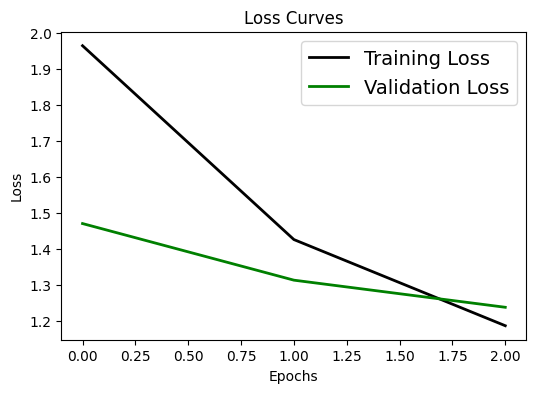

In [17]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

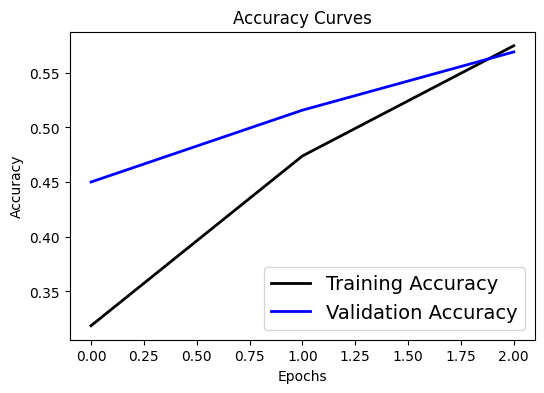

In [18]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [19]:
pred = model.predict(test_images)
print(pred)

pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 5s 17ms/step
[[3.1707135e-03 4.4952277e-03 1.7972935e-02 ... 3.2404382e-03
  7.6758526e-02 1.7131703e-02]
 [3.8318735e-02 2.2767873e-02 5.2453589e-04 ... 2.2265580e-05
  9.3327534e-01 4.8301998e-03]
 [1.4828242e-01 1.8839184e-02 8.5388040e-03 ... 1.1331022e-03
  7.9735821e-01 1.6089635e-02]
 ...
 [3.8334823e-04 1.3779021e-04 1.4327369e-02 ... 7.8156926e-03
  5.1878241e-04 2.6172661e-04]
 [4.6167985e-02 8.5209185e-01 8.5697621e-03 ... 6.0154167e-03
  3.0561173e-02 1.8620158e-02]
 [1.6374625e-03 1.5463072e-04 3.5716319e-03 ... 9.2466849e-01
  3.9212711e-05 5.0803268e-04]]
[6 8 8 ... 5 1 7]


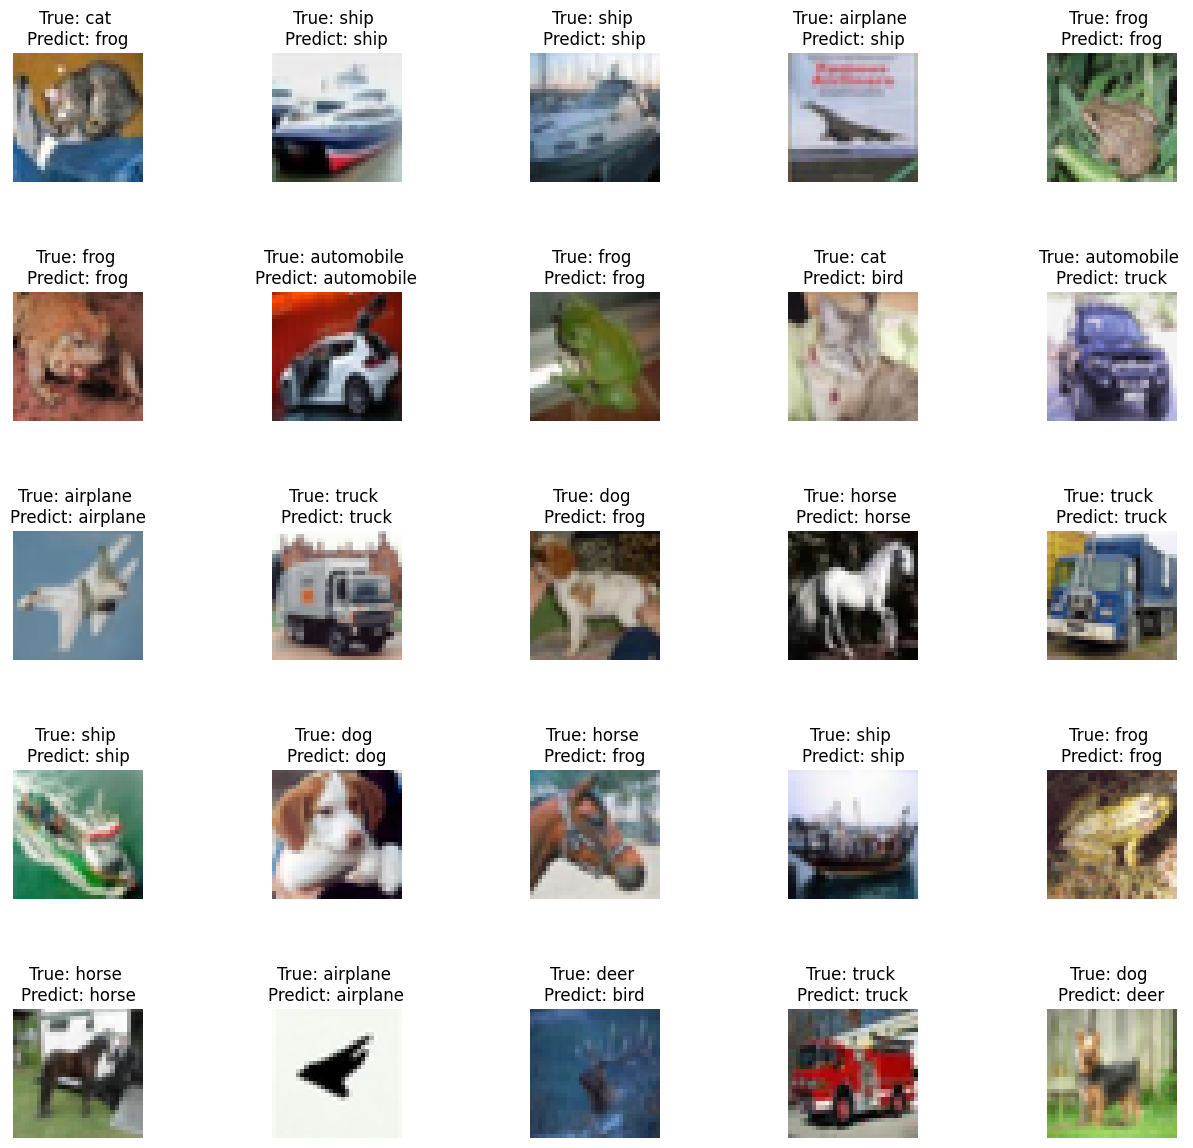

In [20]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)